In [1]:
import numpyro
import jax
import jax.numpy as jnp
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import pandas as pd
import seaborn as sns

from IPython.display import set_matplotlib_formats
import jax.numpy as jnp
from jax import random, vmap
from jax.scipy.special import logsumexp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import numpyro
from numpyro.diagnostics import hpdi
import numpyro.distributions as dist
from numpyro import handlers
from numpyro.infer import MCMC, NUTS

/home/blue_helmet/projects/uerj/uerj/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1)
df = pd.DataFrame(X)
df['y'] = y

<AxesSubplot: xlabel='0', ylabel='y'>

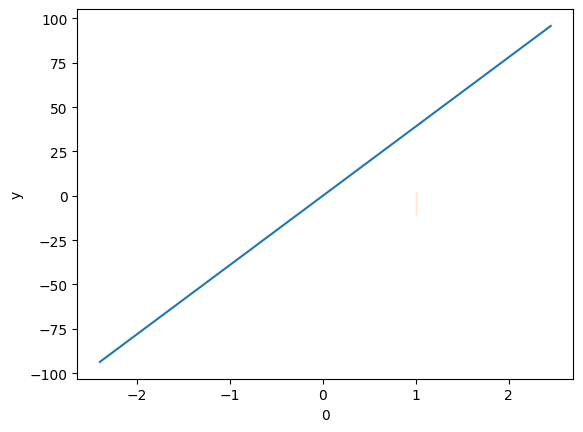

In [3]:
sns.lineplot(data=df, x=0, y='y')
sns.lineplot(data=df, x=1, y='y')

In [4]:
l = LinearRegression().fit(X, y)
print(l.coef_)
print(l.intercept_)

[39.08182572]
-8.881784197001252e-16


In [5]:
def reg_linear(x, y=None):
    a = numpyro.sample('A', numpyro.distributions.Normal(0, 5))
    alpha = numpyro.sample('alpha', numpyro.distributions.Normal(0, 1))
    obs = jnp.dot(x,a) + alpha
    numpyro.sample('y_obs', numpyro.distributions.Normal(obs, 1), obs = y)

In [6]:
from jax import random, vmap

rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)

# Run NUTS.
kernel = NUTS(reg_linear)
num_samples = 25
mcmc = MCMC(kernel, num_warmup=25, num_samples=num_samples)
mcmc.run(
    rng_key_, x=jnp.array(df[0].values),
    y=jnp.array(df['y'].values)
)
mcmc.print_summary()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
sample: 100%|██████████| 50/50 [00:01<00:00, 47.61it/s, 1 steps of size 1.11e-01. acc. prob=0.00]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         A     39.12      0.00     39.12     39.12     39.12       nan      0.96
     alpha     -0.06      0.00     -0.06     -0.06     -0.06       nan      0.96

Number of divergences: 25


In [7]:
samples_1 = mcmc.get_samples()

In [8]:
samples_1

{'A': Array([39.124596, 39.124596, 39.124596, 39.124596, 39.124596, 39.124596,
        39.124596, 39.124596, 39.124596, 39.124596, 39.124596, 39.124596,
        39.124596, 39.124596, 39.124596, 39.124596, 39.124596, 39.124596,
        39.124596, 39.124596, 39.124596, 39.124596, 39.124596, 39.124596,
        39.124596], dtype=float32),
 'alpha': Array([-0.05549655, -0.05549655, -0.05549655, -0.05549655, -0.05549655,
        -0.05549655, -0.05549655, -0.05549655, -0.05549655, -0.05549655,
        -0.05549655, -0.05549655, -0.05549655, -0.05549655, -0.05549655,
        -0.05549655, -0.05549655, -0.05549655, -0.05549655, -0.05549655,
        -0.05549655, -0.05549655, -0.05549655, -0.05549655, -0.05549655],      dtype=float32)}